In [25]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [26]:
df = pd.read_csv('Downloads/HousePricingData.csv')
df.head()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,SaleCondition,SalePrice
0,1,8450,7,5,2003,856,856,854,1710,1,0,2,1,3,1,0,2,Y,Normal,208500
1,2,9600,6,8,1976,1262,1262,0,1262,0,1,2,0,3,1,1,2,Y,Normal,181500
2,3,11250,7,5,2001,920,920,866,1786,1,0,2,1,3,1,1,2,Y,Normal,223500
3,4,9550,7,5,1915,756,961,756,1717,1,0,1,0,3,1,1,3,Y,Abnorml,140000
4,5,14260,8,5,2000,1145,1145,1053,2198,1,0,2,1,4,1,1,3,Y,Normal,250000


In [27]:
df = df.drop(['Id'], axis=1)  

##### Q1

In [29]:
X = df['GrLivArea']
Y = df['SalePrice']

X = sm.add_constant(X)

model1 = sm.OLS(Y, X).fit()

model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          4.52e-223
Time:                        08:39:02   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

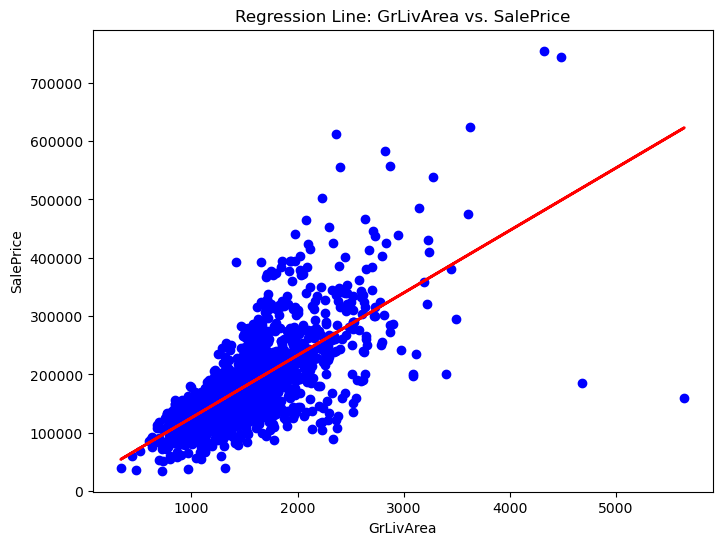

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(df['GrLivArea'], df['SalePrice'], color='blue')
plt.plot(df['GrLivArea'], model1.fittedvalues, color='red', linewidth=2)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Regression Line: GrLivArea vs. SalePrice')
plt.show()

In [31]:
model1.pvalues

const         3.606554e-05
GrLivArea    4.518034e-223
dtype: float64

Since the R-squared value > 0.3 it shows that GrLivArea and SalePrice have a good relationship. The R-squared value being 0.502 means that about 50% of the variation in SalePrice is explained by GrLivArea, while the remaining 50% is influenced by other factors not captured in the model. As the GrLivArea increases the SalesPrice increases by 107.1304.
The p-value for GrLivArea is extremely small (4.518034e-223), making it a highly significant predictor. This means that the GrLivArea has a very strong impact on SalePrice which corresponds to the R-squared value.

##### Q2

In [34]:
X = df['TotalBsmtSF']
Y = df['LotArea']

X = sm.add_constant(X)

model2 = sm.OLS(Y, X).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LotArea   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     106.4
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           3.91e-24
Time:                        08:39:02   Log-Likelihood:                -15464.
No. Observations:                1460   AIC:                         3.093e+04
Df Residuals:                    1458   BIC:                         3.094e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4241.6386    658.492      6.441      0.000    2949.946    5533.331
TotalBsmtSF     5.9344      0.575     10.317      0.000       4.806       7.063
==============================================================================
Omnibus:                     2613.787   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2702216.991
Skew:                          12.411   Prob(JB):                         0.00
Kurtosis:                     212.294   Cond. No.                     2.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

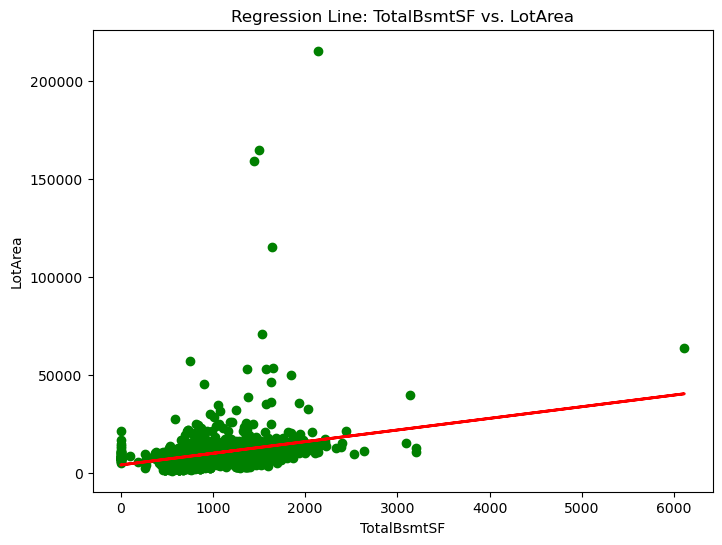

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(df['TotalBsmtSF'], df['LotArea'], color='green')
plt.plot(df['TotalBsmtSF'], model2.fittedvalues, color='red', linewidth=2)
plt.xlabel('TotalBsmtSF')
plt.ylabel('LotArea')
plt.title('Regression Line: TotalBsmtSF vs. LotArea')
plt.show()

In [104]:
model2.pvalues

const          1.603215e-10
TotalBsmtSF    3.911258e-24
dtype: float64

##### Since the R-squared value <0.3 it shows that TotalBsmtSF and LotArea have a weak relationship. The value is 0.068, meaning that only 6.8% of the variation in LotArea is explained by TotalBsmtSF. This indicates a very weak fit of the model, suggesting that TotalBsmtSF is not a significant predictor of LotArea.
##### As TotalBsmtSF increases, LotArea increases by 5.9344.
##### The p-value for TotalBsmtSF is also very small (3.911258e-24), showing that it is a highly significant predictor of SalePrice.
##### Hence, while TotalBsmtSF is a significant predictor, the model as a whole (with only TotalBsmtSF as a predictor) does not explain much of the variation in house prices.

##### Q3

In [38]:
corr1 = df['GrLivArea'].corr(df['SalePrice'])
corr2 = df['TotalBsmtSF'].corr(df['LotArea'])

print(f'Correlation between GrLivArea and SalePrice: {corr1}')
print(f'Correlation between TotalBsmtSF and LotArea: {corr2}')

Correlation between GrLivArea and SalePrice: 0.7086244776126522
Correlation between TotalBsmtSF and LotArea: 0.2608331345451576


##### GrLivArea and SalePrice: The correlation of 0.7086 is strong, supporting the moderate R-squared value from Q1, showing that GrLivArea is a significant predictor of SalePrice. This means that as GrLivArea increases, SalePrice tends to increase as well.

##### TotalBsmtSF and LotArea: The correlation of 0.2608 is weak, consistent with the very low R-squared value from Q2, indicating that TotalBsmtSF is not a strong predictor of LotArea. 

##### Q4

In [41]:
one_hot = pd.get_dummies(df, columns=['PavedDrive', 'SaleCondition'], dtype=int)
X = one_hot.drop(['SalePrice'], axis=1)
Y = one_hot['SalePrice']

X = sm.add_constant(X)

model4 = sm.OLS(Y, X).fit()

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     255.0
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        08:39:03   Log-Likelihood:                -17357.
No. Observations:                1460   AIC:                         3.476e+04
Df Residuals:                    1436   BIC:                         3.489e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.947e+05    7.3e+04     -6.780      0.000   -6.38e+05   -3.52e+05
LotArea                   0.4440      0.102      4.365      0.000       0.244       0.644
OverallQual            1.692e+04   1177.941     14.367      0.000    1.46e+04    1.92e+04
OverallCond            6039.0894    956.584      6.313      0.000    4162.637    7915.541
YearBuilt               341.6491     56.102      6.090      0.000     231.598     451.700
TotalBsmtSF              12.9967      4.158      3.126      0.002       4.841      21.153
1stFlrSF                 36.2027     20.439      1.771      0.077      -3.891      76.297
2ndFlrSF                 25.9362     20.177      1.285      0.199     -13.643      65.515
GrLivArea                30.7754     19.778      1.556      0.120      -8.021      69.572
BsmtFullBath           1.383e+04   2034.384      6.798      0.000    9839.087    1.78e+04
BsmtHalfBath           5091.5630   4051.182      1.257      0.209   -2855.307     1.3e+04
FullBath               2350.7552   2825.817      0.832      0.406   -3192.416    7893.927
HalfBath               -138.2292   2692.136     -0.051      0.959   -5419.170    5142.712
BedroomAbvGr          -5317.9224   1482.744     -3.587      0.000   -8226.498   -2409.346
KitchenAbvGr          -2.131e+04   4855.873     -4.388      0.000   -3.08e+04   -1.18e+04
Fireplaces             5008.3921   1771.339      2.827      0.005    1533.703    8483.081
GarageCars             1.259e+04   1732.280      7.267      0.000    9189.770     1.6e+04
PavedDrive_N          -1.604e+05    2.4e+04     -6.681      0.000   -2.07e+05   -1.13e+05
PavedDrive_P          -1.692e+05   2.46e+04     -6.881      0.000   -2.17e+05   -1.21e+05
PavedDrive_Y          -1.652e+05   2.52e+04     -6.555      0.000   -2.15e+05   -1.16e+05
SaleCondition_Abnorml -9.189e+04   1.28e+04     -7.157      0.000   -1.17e+05   -6.67e+04
SaleCondition_AdjLand  -7.13e+04   1.96e+04     -3.647      0.000    -1.1e+05   -3.29e+04
SaleCondition_Alloca  -8.899e+04   1.57e+04     -5.651      0.000    -1.2e+05   -5.81e+04
SaleCondition_Family  -9.712e+04    1.4e+04     -6.914      0.000   -1.25e+05   -6.96e+04
SaleCondition_Normal  -8.492e+04   1.27e+04     -6.692      0.000    -1.1e+05      -6e+04
SaleCondition_Partial -6.052e+04   1.35e+04     -4.475      0.000    -8.7e+04    -3.4e+04
==============================================================================
Omnibus:                      755.660   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139793.792
Skew:                          -1.296   Prob(JB):                         0.00
Kurtosis:                      50.867   Cond. No.                     5.88e+17
==============================================================================

In [42]:
model4.pvalues

const                    1.748584e-11
LotArea                  1.360238e-05
OverallQual              7.800179e-44
OverallCond              3.635293e-10
YearBuilt                1.448894e-09
TotalBsmtSF              1.808700e-03
1stFlrSF                 7.673325e-02
2ndFlrSF                 1.988429e-01
GrLivArea                1.199107e-01
BsmtFullBath             1.550604e-11
BsmtHalfBath             2.090272e-01
FullBath                 4.056121e-01
HalfBath                 9.590573e-01
BedroomAbvGr             3.463315e-04
KitchenAbvGr             1.227827e-05
Fireplaces               4.756968e-03
GarageCars               6.026648e-13
PavedDrive_N             3.388581e-11
PavedDrive_P             8.871643e-12
PavedDrive_Y             7.718488e-11
SaleCondition_Abnorml    1.307567e-12
SaleCondition_AdjLand    2.748268e-04
SaleCondition_Alloca     1.920894e-08
SaleCondition_Family     7.062461e-12
SaleCondition_Normal     3.154105e-11
SaleCondition_Partial    8.257454e-06
dtype: float

##### R-squared: 0.803 – This indicates that 80.3% of the variability in the dependent variable (SalePrice) can be explained by the independent variables in the model. This is quite a strong R-squared value, suggesting that the model does a good job of explaining the variations in housing prices based on the inputs provided. 

##### The three most significant features (with the lowest p-values):
##### OverallQual (p-value: 7.800179e-44, coefficient: 1.692e+04) – This is the overall quality of the house, and it's highly significant. A higher overall quality increases the SalePrice by approximately 16,920 for each unit increase in quality rating. A higher overall quality rating is one of the strongest predictors of SalePrice. Homes with better quality construction and materials fetch significantly higher prices.
##### GarageCars (p-value: 6.026648e-13, coefficient: 1.259e+04) – The number of cars that can fit in the garage. For each additional car space, the price increases by about 12,590. The number of garage spaces is another strong predictor. Homes with more garage capacity tend to be valued higher, which reflects a preference for homes with more storage or parking space.
##### SaleCondition_Abnorml (p-value: 1.307567e-12, coefficient: -9.189e+04) – It is highly significant in predicting SalePrice, with a p-value of 1.3e-12, suggesting that abnormal sales significantly reduce the sale price.  The negative coefficient (-9.189e+04) shows that if a sale is classified as abnormal, the SalePrice is expected to decrease by approximately 91,890 compared to a normal sale.

##### The three least significant features (with the highest p-values):
##### HalfBath (p-value: 9.590573e-01, coefficient: -138.2292) – This feature has the least significance in predicting SalePrice. The effect is very small and statistically insignificant. The coefficient for HalfBath is -138.23, meaning that even if there is an additional half bathroom, it would have a negligible negative impact on the predicted SalePrice. Since the p-value is much higher than 0.05, we cannot conclude that HalfBath has any meaningful influence on the model’s output.
##### FullBath (p-value: 4.056121e-01, coefficient: 2350.7552) – This feature has the least significance in predicting SalePrice. The effect is very small and statistically insignificant. The coefficient of 2350.7552 means that, theoretically, adding an extra full bathroom would increase the house price by about 2,350. However, due to the high p-value, this relationship is not statistically reliable, and we cannot confidently conclude that this feature has a real effect on SalePrice.
##### BsmtHalfBath (p-value: 2.090272e-01, coefficient: 5091.5630) – Since the p-value is greater than 0.05, it indicates that it is not a statistically significant predictor of SalePrice. The coefficient of 5091.5630 suggests that an additional half bathroom in the basement would theoretically add around 5,091 to the house price. However, with the p-value being above the significance threshold, this effect is not statistically strong.

In [44]:
# Save the model to disk
filename = 'regmodel4.pkl'
pickle.dump(model4, open(filename, 'wb'))

In [45]:
# Load the model from disk
loaded_model = pickle.load(open('regmodel4.pkl', 'rb'))

In [46]:
df_new = pd.DataFrame({'const': [1.0],
                       'LotArea':[12000],
                       'OverallQual':[8],
                       'OverallCond': [7],
                       'YearBuilt': [2004],
                       'TotalBsmtSF': [2000],
                       '1stFlrSF':[800],
                       '2ndFlrSF': [700],
                       'GrLivArea': [1800],
                       'BsmtFullBath':[1],
                       'BsmtHalfBath':[0],
                       'FullBath':[1],
                       'HalfBath':[1],
                       'BedroomAbvGr':[4],
                       'KitchenAbvGr': [1],
                       'Fireplaces':[1],
                       'GarageCars':[3],
                       'SaleCondition_Abnorml':[0],
                       'SaleCondition_AdjLand':[0],
                       'SaleCondition_Alloca':[0],
                       'SaleCondition_Family':[1],
                       'SaleCondition_Normal':[0],
                       'SaleCondition_Partial':[0],
                       'PavedDrive_N':[0],
                       'PavedDrive_P':[0],
                       'PavedDrive_Y':[1]
                      })

In [47]:
df_new

,const,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,GarageCars,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,1.0,12000,8,7,2004,2000,800,700,1800,1,...,3,0,0,0,1,0,0,0,0,1


In [48]:
model4.predict(df_new)

0    365258.015536
dtype: float64

In [49]:
loaded_model.predict(df_new)

0    365258.015536
dtype: float64

##### For the new house, using the regression model above, the predicted SalesPrice is  365258.015536.

##### Q5

In [52]:
X = one_hot.drop(['LotArea'], axis=1)
Y = one_hot['LotArea']

X = sm.add_constant(X)

model5 = sm.OLS(Y, X).fit()

model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LotArea   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     13.01
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           8.65e-45
Time:                        08:39:03   Log-Likelihood:                -15377.
No. Observations:                1460   AIC:                         3.080e+04
Df Residuals:                    1436   BIC:                         3.093e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.331e+04   1.91e+04      2.271      0.023    5902.290    8.07e+04
OverallQual           -1893.6453    320.810     -5.903      0.000   -2522.952   -1264.339
OverallCond             -81.4211    249.930     -0.326      0.745    -571.688     408.845
YearBuilt               -29.0314     14.625     -1.985      0.047     -57.719      -0.343
TotalBsmtSF               1.9934      1.074      1.856      0.064      -0.113       4.100
1stFlrSF                  5.4271      5.272      1.029      0.303      -4.914      15.768
2ndFlrSF                  3.2060      5.202      0.616      0.538      -6.999      13.411
GrLivArea                -1.7279      5.101     -0.339      0.735     -11.735       8.279
BsmtFullBath           1710.6717    530.777      3.223      0.001     669.491    2751.852
BsmtHalfBath           2038.1382   1043.302      1.954      0.051      -8.422    4084.698
FullBath                458.7982    728.374      0.630      0.529    -969.994    1887.590
HalfBath               -527.2643    693.707     -0.760      0.447   -1888.052     833.523
BedroomAbvGr            536.6054    383.595      1.399      0.162    -215.861    1289.072
KitchenAbvGr          -2310.8834   1258.392     -1.836      0.067   -4779.368     157.601
Fireplaces             2219.8838    454.034      4.889      0.000    1329.243    3110.524
GarageCars              559.8016    454.356      1.232      0.218    -331.471    1451.074
SalePrice                 0.0295      0.007      4.365      0.000       0.016       0.043
PavedDrive_N            1.48e+04   6270.666      2.359      0.018    2494.621    2.71e+04
PavedDrive_P           1.493e+04   6428.733      2.322      0.020    2316.301    2.75e+04
PavedDrive_Y           1.359e+04   6580.330      2.065      0.039     681.353    2.65e+04
SaleCondition_Abnorml  7294.3343   3361.770      2.170      0.030     699.828    1.39e+04
SaleCondition_AdjLand  6914.6106   5058.800      1.367      0.172   -3008.819    1.68e+04
SaleCondition_Alloca   7593.4146   4098.862      1.853      0.064    -446.984    1.56e+04
SaleCondition_Family   6751.5498   3675.619      1.837      0.066    -458.608     1.4e+04
SaleCondition_Normal   7791.1782   3314.989      2.350      0.019    1288.439    1.43e+04
SaleCondition_Partial  6966.6380   3504.950      1.988      0.047      91.266    1.38e+04
==============================================================================
Omnibus:                     2614.176   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2806522.416
Skew:                          12.394   Prob(JB):                         0.00
Kurtosis:                     216.355   Cond. No.                     4.09e+17
==============================================================================

In [53]:
model5.pvalues

const                    2.328767e-02
OverallQual              4.455178e-09
OverallCond              7.446413e-01
YearBuilt                4.732388e-02
TotalBsmtSF              6.363624e-02
1stFlrSF                 3.034238e-01
2ndFlrSF                 5.378269e-01
GrLivArea                7.348783e-01
BsmtFullBath             1.297222e-03
BsmtHalfBath             5.094898e-02
FullBath                 5.288646e-01
HalfBath                 4.473389e-01
BedroomAbvGr             1.620633e-01
KitchenAbvGr             6.650849e-02
Fireplaces               1.125990e-06
GarageCars               2.181220e-01
SalePrice                1.360238e-05
PavedDrive_N             1.843569e-02
PavedDrive_P             2.037643e-02
PavedDrive_Y             3.908688e-02
SaleCondition_Abnorml    3.018630e-02
SaleCondition_AdjLand    1.718869e-01
SaleCondition_Alloca     6.414958e-02
SaleCondition_Family     6.643903e-02
SaleCondition_Normal     1.889359e-02
SaleCondition_Partial    4.703934e-02
dtype: float

##### The model has an R-squared value of 0.172, which indicates that approximately 17.2% of the variability in LotArea is explained by the model. This is a relatively low value, suggesting that the model does not capture a large portion of the variation in LotArea.

##### The three most significant features (with the lowest p-values):
##### OverallQual (p-value: 4.45e-09): The overall quality of the house is highly significant in predicting LotArea. The coefficient of -1893.6453 implies that as the quality increases by one unit, LotArea decreases by approximately 1894 square feet, suggesting that higher-quality homes might be built on smaller lots.
##### SalePrice (p-value: 1.36e-05): The price of the home is positively correlated with LotArea. For every unit increase in SalePrice, the lot area is predicted to increase by a small amount (coefficient: 0.0295).
##### Fireplaces (p-value: 1.13e-06): Homes with more fireplaces tend to have larger lot areas. The coefficient (2219.8838) suggests that having one more fireplace increases the lot area by approximately 2220 square feet.

##### The three least significant features (with the highest p-values):
##### OverallCond (p-value: 0.745): The overall condition of the house does not significantly influence LotArea. Its high p-value (0.745) and low coefficient (-81.4211) suggest that changes in the house's condition have a negligible impact on the lot size.
##### GrLivArea (p-value: 0.735): The GrLivArea also has an insignificant effect on LotArea. Its p-value is 0.735, and its coefficient (-1.7279) is very small, showing a weak and statistically insignificant relationship.
##### 2ndFlrSF (p-value: 0.554): The 2ndFlrSF also has an insignificant effect on LotArea. Its coefficient is positive 3.2060, however, due to the high p-value the relationship is still weak and statistically insignificant. 

In [55]:
# Save the model to disk
filename = 'regmodel5.pkl'
pickle.dump(model5, open(filename, 'wb'))

In [56]:
# Load the model from disk
loaded_model = pickle.load(open('regmodel5.pkl', 'rb'))

In [57]:
df_new = pd.DataFrame({'const': [1.0],
                       'OverallQual':[8],
                       'OverallCond': [7],
                       'YearBuilt': [2004],
                       'TotalBsmtSF': [2000],
                       '1stFlrSF':[800],
                       '2ndFlrSF': [700],
                       'GrLivArea': [1800],
                       'BsmtFullBath':[1],
                       'BsmtHalfBath':[0],
                       'FullBath':[1],
                       'HalfBath':[1],
                       'BedroomAbvGr':[4],
                       'KitchenAbvGr': [1],
                       'Fireplaces':[1],
                       'GarageCars':[3],
                       'SalePrice': [365000],
                       'SaleCondition_Abnorml':[0],
                       'SaleCondition_AdjLand':[0],
                       'SaleCondition_Alloca':[0],
                       'SaleCondition_Family':[1],
                       'SaleCondition_Normal':[0],
                       'SaleCondition_Partial':[0],
                       'PavedDrive_N':[0],
                       'PavedDrive_P':[0],
                       'PavedDrive_Y':[1]
                      })

In [58]:
model5.predict(df_new)

0    7279.787674
dtype: float64

In [59]:
loaded_model.predict(df_new)

0    7279.787674
dtype: float64

##### For the new house, using the regression model above, the predicted LotArea is 7279.787674.

##### Q6

In [62]:
one_hot_1 = one_hot.drop(['1stFlrSF','2ndFlrSF','GrLivArea', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)
X = one_hot_1.drop(['SalePrice'],axis=1)
Y = one_hot_1['SalePrice']

X = sm.add_constant(X)

model6 = sm.OLS(Y, X).fit()

model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     258.4
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        08:39:04   Log-Likelihood:                -17524.
No. Observations:                1460   AIC:                         3.508e+04
Df Residuals:                    1442   BIC:                         3.518e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.244e+05   7.03e+04     -4.617      0.000   -4.62e+05   -1.87e+05
LotArea                   0.6879      0.113      6.112      0.000       0.467       0.909
OverallQual             2.63e+04   1172.051     22.435      0.000     2.4e+04    2.86e+04
OverallCond            5003.4352   1056.883      4.734      0.000    2930.242    7076.628
YearBuilt               188.4952     53.575      3.518      0.000      83.402     293.588
TotalBsmtSF              29.0364      3.123      9.297      0.000      22.910      35.163
BsmtFullBath           1.207e+04   2200.508      5.486      0.000    7754.908    1.64e+04
BedroomAbvGr           9735.2845   1368.080      7.116      0.000    7051.645    1.24e+04
KitchenAbvGr          -4621.8269   5200.420     -0.889      0.374   -1.48e+04    5579.372
Fireplaces             1.453e+04   1873.409      7.757      0.000    1.09e+04    1.82e+04
GarageCars             1.898e+04   1892.292     10.030      0.000    1.53e+04    2.27e+04
PavedDrive_N          -1.014e+05   2.31e+04     -4.392      0.000   -1.47e+05   -5.61e+04
PavedDrive_P          -1.148e+05   2.37e+04     -4.841      0.000   -1.61e+05   -6.83e+04
PavedDrive_Y          -1.081e+05   2.45e+04     -4.413      0.000   -1.56e+05   -6.01e+04
SaleCondition_Abnorml -6.118e+04   1.23e+04     -4.955      0.000   -8.54e+04    -3.7e+04
SaleCondition_AdjLand -4.677e+04    2.1e+04     -2.226      0.026    -8.8e+04   -5555.581
SaleCondition_Alloca  -5.117e+04    1.6e+04     -3.204      0.001   -8.25e+04   -1.98e+04
SaleCondition_Family  -7.729e+04   1.41e+04     -5.490      0.000   -1.05e+05   -4.97e+04
SaleCondition_Normal  -5.708e+04   1.23e+04     -4.640      0.000   -8.12e+04   -3.29e+04
SaleCondition_Partial -3.089e+04   1.33e+04     -2.321      0.020    -5.7e+04   -4781.637
==============================================================================
Omnibus:                      634.582   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28283.258
Skew:                           1.287   Prob(JB):                         0.00
Kurtosis:                      24.408   Cond. No.                     1.90e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.65e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### The full model (R-squared = 0.803) performs better in explaining the variance in SalePrice compared to the simplified model (R-squared = 0.753). This means the full model explains about 80.3% of the variance in SalePrice, whereas the simplified model explains about 75.3%.
##### The difference in explained variance is 5%, which suggests that dropping insignificant variables reduces the model's ability to predict SalePrice but not drastically.

##### I would prefer the simplified model with significant inputs. Although it has a slightly lower R-squared (0.753 vs. 0.803), it offers advantages such as: being easier to interpret and generalize, by focusing on the most relevant inputs, the model may perform better on new data, and the slight reduction in R-squared is compensated by the model's simplicity and generalization potential.

##### Q7

In [65]:
# Save the model to disk
filename = 'regmodel6.pkl'
pickle.dump(model6, open(filename, 'wb'))

In [66]:
# Load the model from disk
loaded_model = pickle.load(open('regmodel6.pkl', 'rb'))

In [67]:
df_3_new = pd.DataFrame({
    'const': [1.0, 1.0, 1.0],
    'LotArea': [12000, 9000, 17000],
    'OverallQual': [8, 5, 7],
    'OverallCond': [7, 6, 8],
    'YearBuilt': [2004, 1999, 2007],
    'TotalBsmtSF': [900, 1000, 1200],
    'BsmtFullBath': [2, 1, 0],
    'BedroomAbvGr': [4, 2, 3],
    'KitchenAbvGr': [1, 1, 1],
    'Fireplaces': [2, 3, 1],
    'GarageCars': [3, 1, 2],
    'SaleCondition_Abnorml': [0, 0, 0],
    'SaleCondition_AdjLand': [0, 0, 0],
    'SaleCondition_Alloca': [0, 0, 0],
    'SaleCondition_Family': [1, 0, 0],
    'SaleCondition_Normal': [1, 0, 1],
    'SaleCondition_Partial': [0, 0, 0],
    'PavedDrive_N': [0, 1, 0],
    'PavedDrive_P': [0, 0, 0],
    'PavedDrive_Y': [1, 0, 1]
})

In [68]:
df_3_new

,const,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,1.0,12000,8,7,2004,900,2,4,1,2,3,0,0,0,1,1,0,0,0,1
1,1.0,9000,5,6,1999,1000,1,2,1,3,1,0,0,0,0,0,0,1,0,0
2,1.0,17000,7,8,2007,1200,0,3,1,1,2,0,0,0,0,1,0,0,0,1


In [69]:
model6.predict(df_3_new)

0    338779.425552
1    261362.176953
2    323994.270514
dtype: float64

In [70]:
loaded_model.predict(df_3_new)

0    338779.425552
1    261362.176953
2    323994.270514
dtype: float64

##### The predicted saleprice for each house correlates to the features of each house, hence showig that our model predicts correctly.

##### House 1 (338779.425552): This seems reasonable given the relatively large lot size, high overall quality, good condition, a recent year built, 4 bedrooms, 2 fireplaces, and a 3-car garage. These are all factors that would drive up the price. So, this prediction is sensible.
##### House 2 (261362.176953): This price is lower compared to House 1, which makes sense since this house has a smaller lot size, average quality, older construction, fewer bedrooms, and a smaller garage (1 car). Even though it has more fireplaces, it is unlikely to offset the other factors, making this prediction reasonable.
##### House 3 (323994.270514): This house has a large lot size, good quality, and condition, and is the most recently built of the three. The 2-car garage and normal sale condition support the prediction being slightly lower than House 1 (despite the larger lot), which is consistent due to fewer fireplaces and lower overall quality. This prediction seems logical and aligns with the input features.